# XGBoost Implementation

## 1. Install Dependencies

In [1]:
!pip install mlcroissant

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 18.0 MB/s eta 0:00:00
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15127 sha256=62fceda8273071d8ca7bca231a198bb89aa73d0218e90f7d66e62a962bd81b79
  Stored in directory: /root/.cache/pip/wheels/53/cf/51/a4ea10224b7fdb523e18e2033cadf2a8657517d1f95f3f5413
Successfully built jsonpath-rw


## 2. Import Dependencies

In [16]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import mlcroissant as mlc
import itertools
import joblib
import xgboost as xgb
from sklearn.calibration import calibration_curve

## 3. Download Dataset

In [3]:
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/katehighnam/beth-dataset/croissant/download')

  -  [Metadata(BETH Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


## 4. Retrieve and display metadata record sets

In [4]:
record_sets = croissant_dataset.metadata.record_sets
for record in record_sets:
    print(record)

RecordSet(uuid="labelled_2021may-ip-10-100-1-105-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-105.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-186-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-186.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-26-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-26.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-4-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-4.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-95-dns.csv")
RecordSet(uuid="labelled_2021may-ip-10-100-1-95.csv")
RecordSet(uuid="labelled_2021may-ubuntu-dns.csv")
RecordSet(uuid="labelled_2021may-ubuntu.csv")
RecordSet(uuid="labelled_testing_data.csv")
RecordSet(uuid="labelled_training_data.csv")
RecordSet(uuid="labelled_validation_data.csv")


Extract the first record set and convert to a DataFrame

In [5]:
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()


,labelled_2021may-ip-10-100-1-105-dns.csv/Timestamp,labelled_2021may-ip-10-100-1-105-dns.csv/SourceIP,labelled_2021may-ip-10-100-1-105-dns.csv/DestinationIP,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQuery,labelled_2021may-ip-10-100-1-105-dns.csv/DnsAnswer,labelled_2021may-ip-10-100-1-105-dns.csv/DnsAnswerTTL,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryNames,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryClass,labelled_2021may-ip-10-100-1-105-dns.csv/DnsQueryType,labelled_2021may-ip-10-100-1-105-dns.csv/NumberOfAnswers,labelled_2021may-ip-10-100-1-105-dns.csv/DnsResponseCode,labelled_2021may-ip-10-100-1-105-dns.csv/DnsOpCode,labelled_2021may-ip-10-100-1-105-dns.csv/SensorId,labelled_2021may-ip-10-100-1-105-dns.csv/sus,labelled_2021may-ip-10-100-1-105-dns.csv/evil
0,2021-05-16 17:13:14+00:00,b'10.100.1.95',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",0,0,0,b'ip-10-100-1-95',0,0
1,2021-05-16 17:13:14+00:00,b'10.100.0.2',b'10.100.1.95',b'ssm.us-east-2.amazonaws.com',"b""['52.95.19.240']""","b""['17']""",b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",1,0,0,b'ip-10-100-1-95',0,0
2,2021-05-16 17:13:14+00:00,b'10.100.1.95',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['AAAA']""",0,0,0,b'ip-10-100-1-95',0,0
3,2021-05-16 17:13:14+00:00,b'10.100.0.2',b'10.100.1.95',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['AAAA']""",0,0,0,b'ip-10-100-1-95',0,0
4,2021-05-16 17:13:16+00:00,b'10.100.1.186',b'10.100.0.2',b'ssm.us-east-2.amazonaws.com',None,None,b'ssm.us-east-2.amazonaws.com',"b""['IN']""","b""['A']""",0,0,0,b'ip-10-100-1-186',0,0


In [6]:
!curl -L -o ~/beth-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/katehighnam/beth-dataset

!unzip /root/beth-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 39.7M  100 39.7M    0     0  45.4M      0 --:--:-- --:--:-- --:--:-- 71.8M
Archive:  /root/beth-dataset.zip
  inflating: labelled_2021may-ip-10-100-1-105-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-105.csv  
  inflating: labelled_2021may-ip-10-100-1-186-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-186.csv  
  inflating: labelled_2021may-ip-10-100-1-26-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-26.csv  
  inflating: labelled_2021may-ip-10-100-1-4-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-4.csv  
  inflating: labelled_2021may-ip-10-100-1-95-dns.csv  
  inflating: labelled_2021may-ip-10-100-1-95.csv  
  inflating: labelled_2021may-ubuntu-dns.csv  
  inflating: labelled_2021may-ubuntu.csv  
  inflating: labelled_testing

## 6. Merge Datasets

In [7]:
csv_files = [
    'labelled_2021may-ip-10-100-1-105-dns.csv',
    'labelled_2021may-ip-10-100-1-105.csv',
    'labelled_2021may-ip-10-100-1-186-dns.csv',
    'labelled_2021may-ip-10-100-1-186.csv',
    'labelled_2021may-ip-10-100-1-26-dns.csv',
    'labelled_2021may-ip-10-100-1-26.csv',
    'labelled_2021may-ip-10-100-1-4-dns.csv',
    'labelled_2021may-ip-10-100-1-4.csv',
    'labelled_2021may-ip-10-100-1-95-dns.csv',
    'labelled_2021may-ip-10-100-1-95.csv',
    'labelled_2021may-ubuntu-dns.csv',
    'labelled_2021may-ubuntu.csv',
    'labelled_testing_data.csv',
    'labelled_training_data.csv',
    'labelled_validation_data.csv'
]

combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

combined_data.to_csv('combined_dataset.csv', index=False)

print(f"Combined dataset shape: {combined_data.shape}")
print(combined_data.head())


Combined dataset shape: (3808810, 29)
              Timestamp      SourceIP DestinationIP  \
0  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
1  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
2  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
3  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
4  2021-05-16T17:13:16Z  10.100.1.186    10.100.0.2   

                      DnsQuery         DnsAnswer DnsAnswerTTL  \
0  ssm.us-east-2.amazonaws.com               NaN          NaN   
1  ssm.us-east-2.amazonaws.com  ['52.95.19.240']       ['17']   
2  ssm.us-east-2.amazonaws.com               NaN          NaN   
3  ssm.us-east-2.amazonaws.com               NaN          NaN   
4  ssm.us-east-2.amazonaws.com               NaN          NaN   

                 DnsQueryNames DnsQueryClass DnsQueryType  NumberOfAnswers  \
0  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              0.0   
1  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              1.0   
2  ssm

## 7. Data Summary, Info, Description

In [8]:
df = pd.read_csv("combined_dataset.csv")
print(df.head())
print(df.info())
print(df.describe())


<ipython-input-8-d891aa00041c>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,12,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_dataset.csv")


              Timestamp      SourceIP DestinationIP  \
0  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
1  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
2  2021-05-16T17:13:14Z   10.100.1.95    10.100.0.2   
3  2021-05-16T17:13:14Z    10.100.0.2   10.100.1.95   
4  2021-05-16T17:13:16Z  10.100.1.186    10.100.0.2   

                      DnsQuery         DnsAnswer DnsAnswerTTL  \
0  ssm.us-east-2.amazonaws.com               NaN          NaN   
1  ssm.us-east-2.amazonaws.com  ['52.95.19.240']       ['17']   
2  ssm.us-east-2.amazonaws.com               NaN          NaN   
3  ssm.us-east-2.amazonaws.com               NaN          NaN   
4  ssm.us-east-2.amazonaws.com               NaN          NaN   

                 DnsQueryNames DnsQueryClass DnsQueryType  NumberOfAnswers  \
0  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              0.0   
1  ssm.us-east-2.amazonaws.com        ['IN']        ['A']              1.0   
2  ssm.us-east-2.amazonaws.com        ['IN']

## 8. Handling Missing Values

In [9]:
df2 = pd.read_csv("combined_dataset.csv")

missing_values = df2.isnull().sum()
print("missing values")
print(missing_values[missing_values > 0])

threshold = 0.6 * len(df2)
df2 = df2.dropna(thresh=threshold, axis=1)

df2.fillna(df2.median(numeric_only=True), inplace=True)

df2.fillna("Unknown", inplace=True)

print("verify")
print(df2.isnull().sum())


<ipython-input-9-8f36dce0b5b9>:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,12,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("combined_dataset.csv")


missing values
Timestamp          3807196
SourceIP           3807196
DestinationIP      3807196
DnsQuery           3807196
DnsAnswer          3808420
DnsAnswerTTL       3808420
DnsQueryNames      3807196
DnsQueryClass      3807196
DnsQueryType       3807196
NumberOfAnswers    3807196
DnsResponseCode    3807196
DnsOpCode          3807196
SensorId           3807196
timestamp             1614
processId             1614
parentProcessId       1614
userId                1614
processName           1614
hostName              1614
eventId               1614
eventName             1614
argsNum               1614
returnValue           1614
args                  1614
threadId           2667732
mountNamespace     2667732
stackAddresses     2667732
dtype: int64
verify
sus                0
evil               0
timestamp          0
processId          0
parentProcessId    0
userId             0
processName        0
hostName           0
eventId            0
eventName          0
argsNum            0
retur

## 9. Preprocessing - Classify Columns

In [10]:
def auto_classify_columns(data):
    categorical_columns = []
    numerical_columns = []

    for col in data.columns:
        if data[col].dtype == 'object':
            unique_vals = data[col].nunique()
            if unique_vals < 0.1 * len(data):
                categorical_columns.append(col)
            else:
                try:
                    data[col] = pd.to_numeric(data[col], errors='raise')
                    numerical_columns.append(col)
                except:
                    categorical_columns.append(col)
        else:
            numerical_columns.append(col)

    return categorical_columns, numerical_columns

categorical_columns, numerical_columns = auto_classify_columns(combined_data)

print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: ['Timestamp', 'SourceIP', 'DestinationIP', 'DnsQuery', 'DnsAnswer', 'DnsAnswerTTL', 'DnsQueryNames', 'DnsQueryClass', 'DnsQueryType', 'SensorId', 'processName', 'hostName', 'eventName', 'args', 'stackAddresses']
Numerical columns: ['NumberOfAnswers', 'DnsResponseCode', 'DnsOpCode', 'sus', 'evil', 'timestamp', 'processId', 'parentProcessId', 'userId', 'eventId', 'argsNum', 'returnValue', 'threadId', 'mountNamespace']


## 10. Encoding and Feature Selection

In [11]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

X = combined_data.drop(columns=['evil', 'stackAddresses', 'args', 'argsNum', 'returnValue'])
y = combined_data['evil']

## 11. Handling Missing and Infinite Values

In [12]:
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X after scaling:", X_scaled.shape)

Shape of X after scaling: (3808810, 24)


## 12. Data Splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 13. Train XGBoost

Accuracy: 1.0000
Precision: 0.9999
Recall: 0.9996
F1 Score: 0.9998


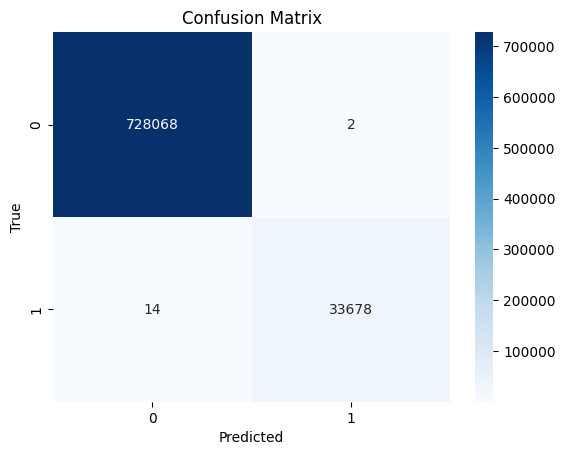

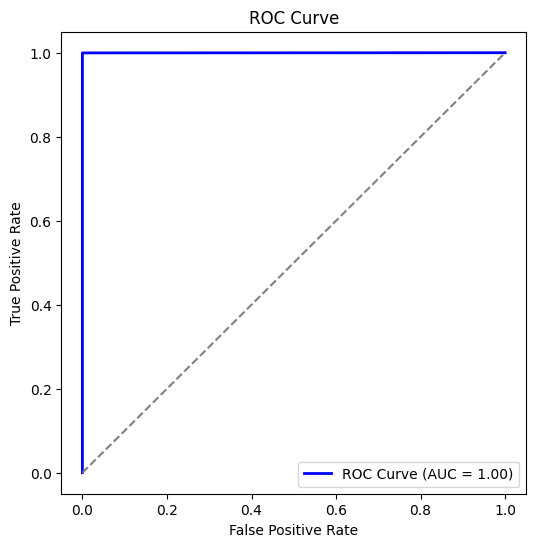

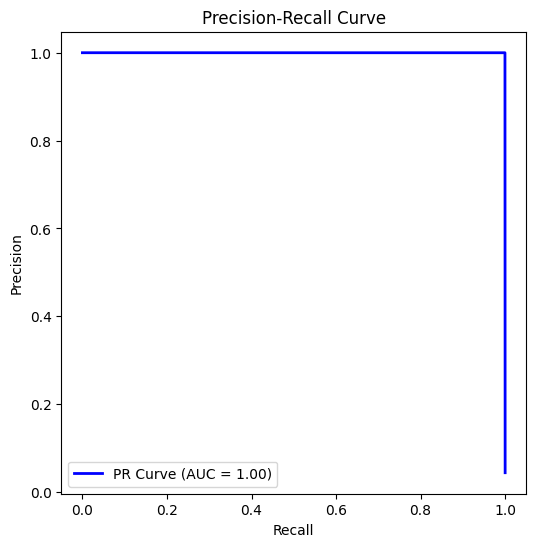

In [15]:
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_vals, precision_vals)
plt.figure(figsize=(6,6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2, label=f"PR Curve (AUC = {pr_auc:.2f})")
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

## 14. Residuals

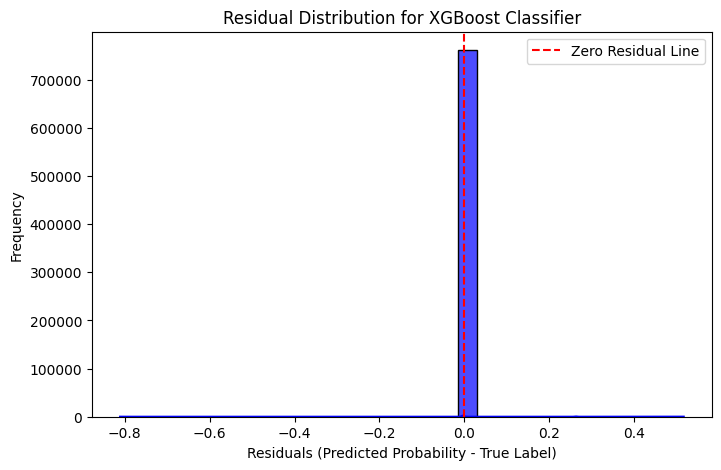

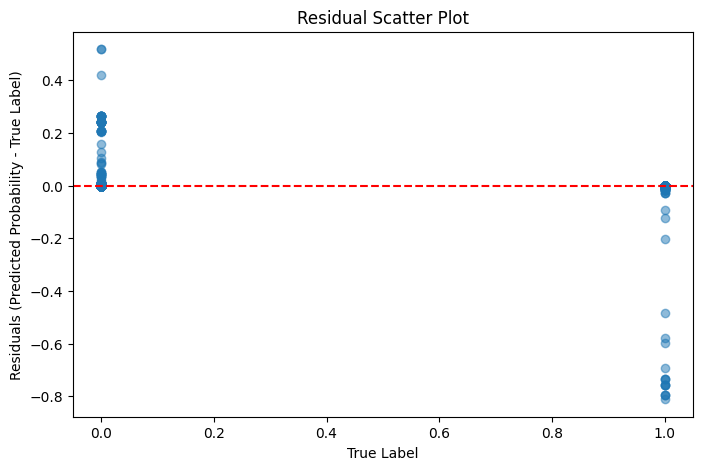

In [17]:
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1
residuals = y_probs - y_test

# Plot residuals distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', label="Zero Residual Line")
plt.title("Residual Distribution for XGBoost Classifier")
plt.xlabel("Residuals (Predicted Probability - True Label)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Scatter Plot")
plt.xlabel("True Label")
plt.ylabel("Residuals (Predicted Probability - True Label)")
plt.show()


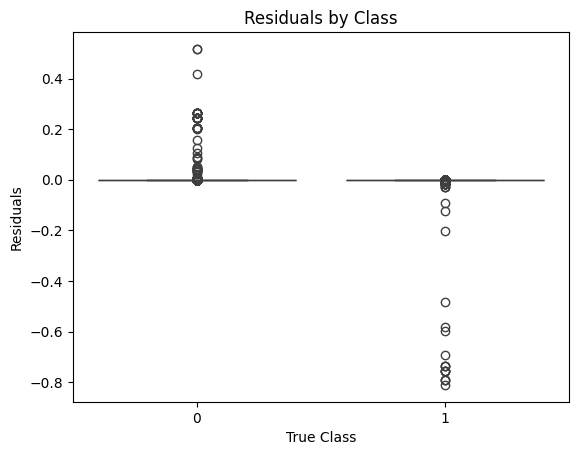

In [18]:
sns.boxplot(x=y_test, y=residuals)
plt.title("Residuals by Class")
plt.xlabel("True Class")
plt.ylabel("Residuals")
plt.show()


## 15. Feature Importance

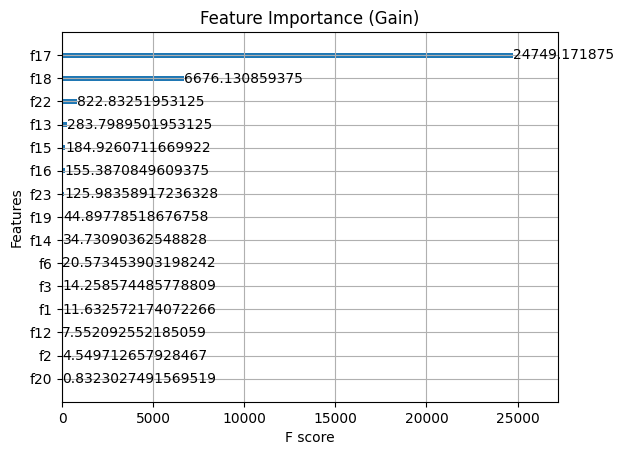

In [19]:
xgb.plot_importance(model, importance_type="gain", max_num_features=15, title="Feature Importance (Gain)")
plt.show()

## 16. Calibration

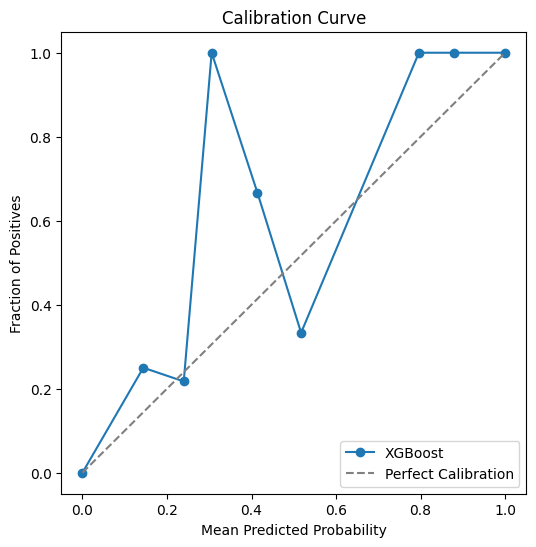

In [20]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Compute calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_probs, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(6,6))
plt.plot(mean_predicted_value, fraction_of_positives, marker='o', linestyle='-', label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfect Calibration", color="gray")
plt.title("Calibration Curve")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.show()


## 17. Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='logloss'),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


# Data Exploration

## Distribution of Numerical Features

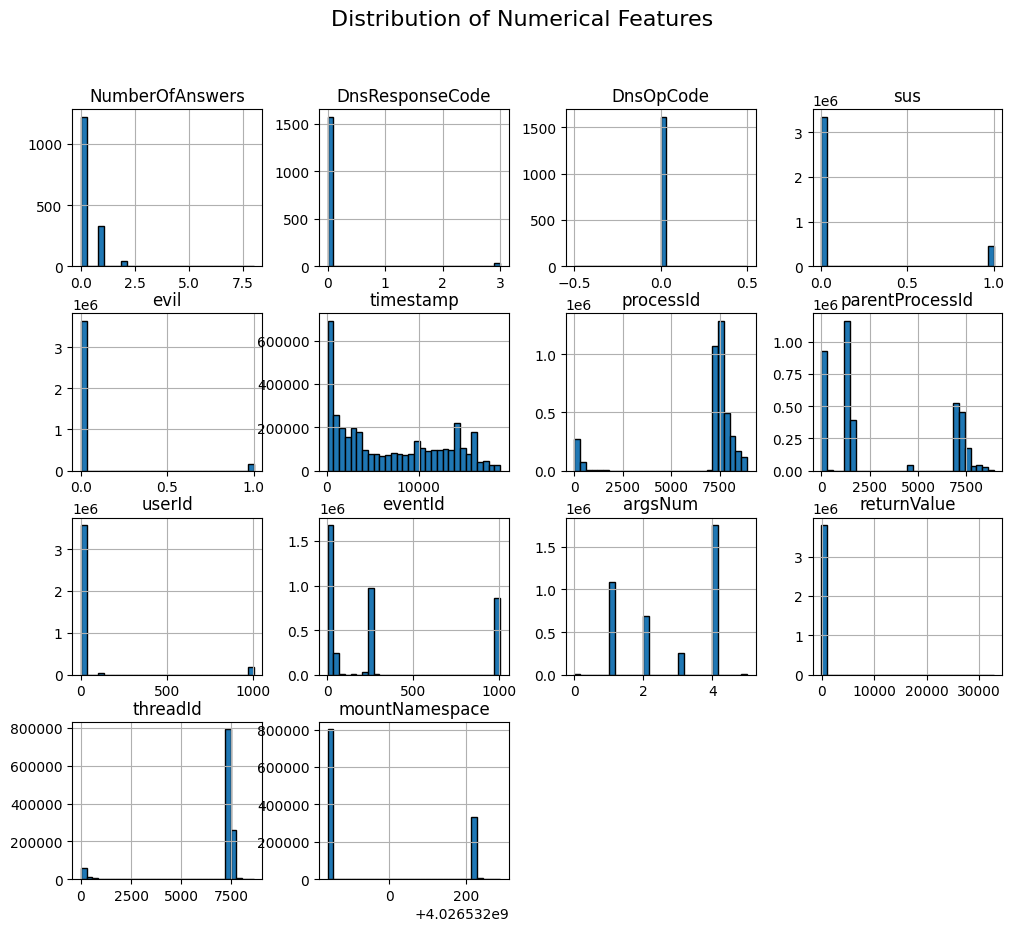

In [ ]:
combined_data[numerical_columns].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

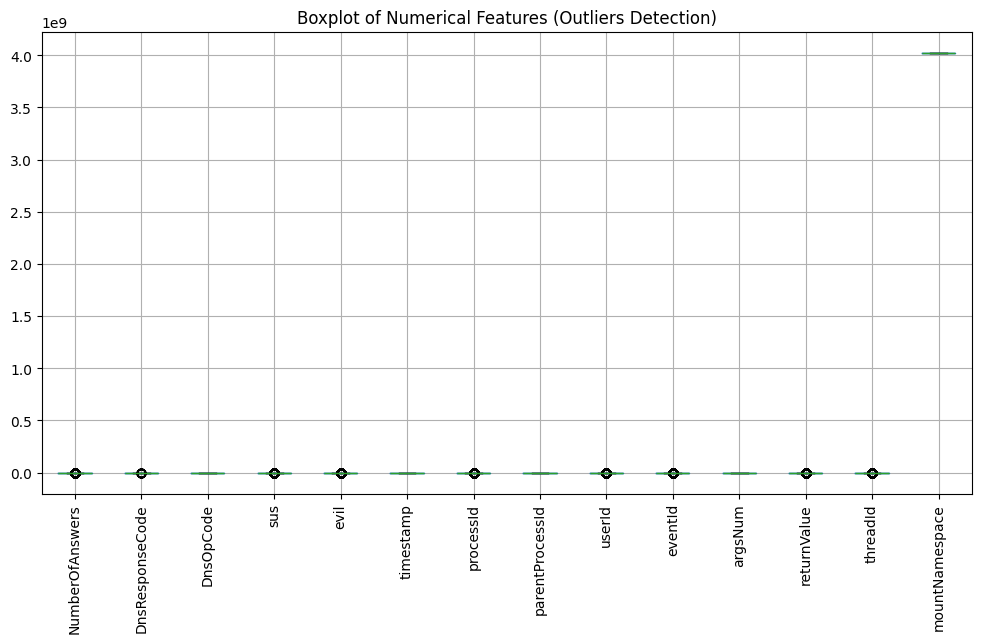

In [ ]:
plt.figure(figsize=(12, 6))
combined_data[numerical_columns].boxplot(rot=90)  # Rotate labels for better readability
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()


## Categorical Data Distribution

<ipython-input-54-d8033c5d3b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_data[col], order=combined_data[col].value_counts().index, palette='Set2')
<ipython-input-54-d8033c5d3b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_data[col], order=combined_data[col].value_counts().index, palette='Set2')
<ipython-input-54-d8033c5d3b70>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=combined_data[col], order=combined_data[col].value_counts().index, palette='Set2')
<ipython-input-54-d8033c5d3b70>:4: FutureWa

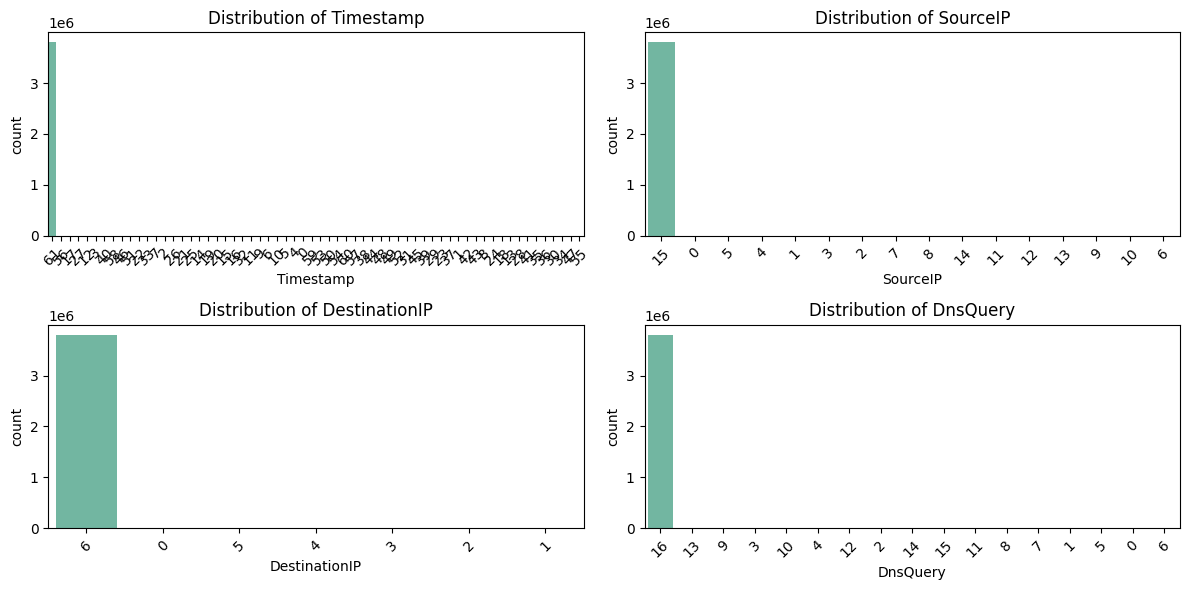

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns[:4]):  # Limit to 4 categorical features
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=combined_data[col], order=combined_data[col].value_counts().index, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


## Bivariate Analysis

1. Correlation Matrix for Numerical Features
2. Boxplots for Categorical Features vs. Target

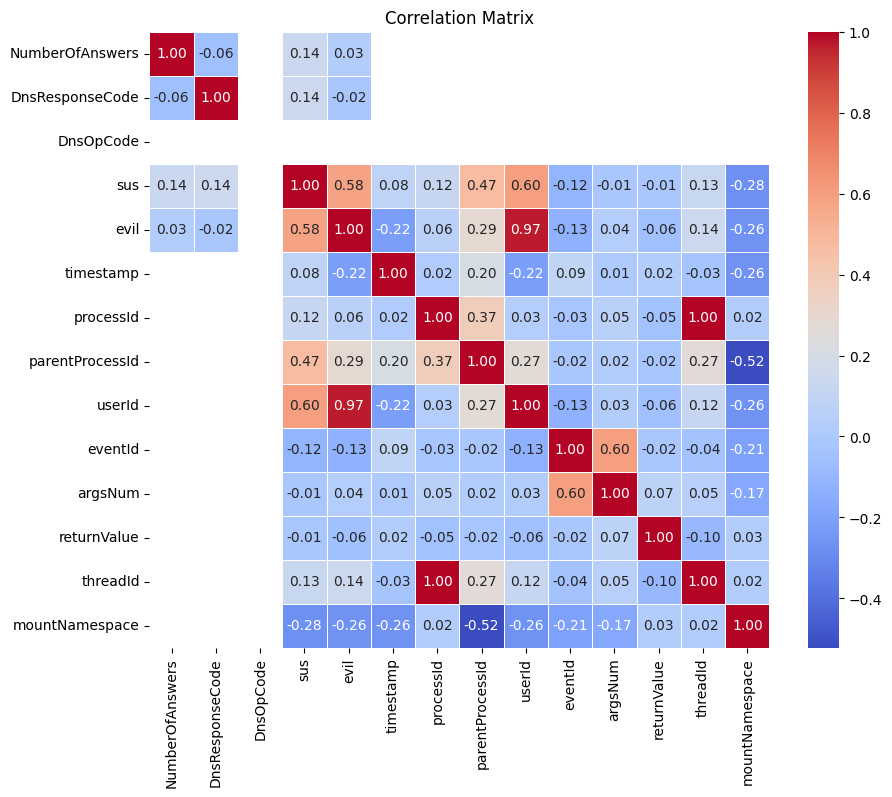

<ipython-input-12-46b21f309772>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_data[col], y=combined_data['evil'], palette='Set3')
<ipython-input-12-46b21f309772>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_data[col], y=combined_data['evil'], palette='Set3')
<ipython-input-12-46b21f309772>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=combined_data[col], y=combined_data['evil'], palette='Set3')
<ipython-input-12-46b21f309772>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

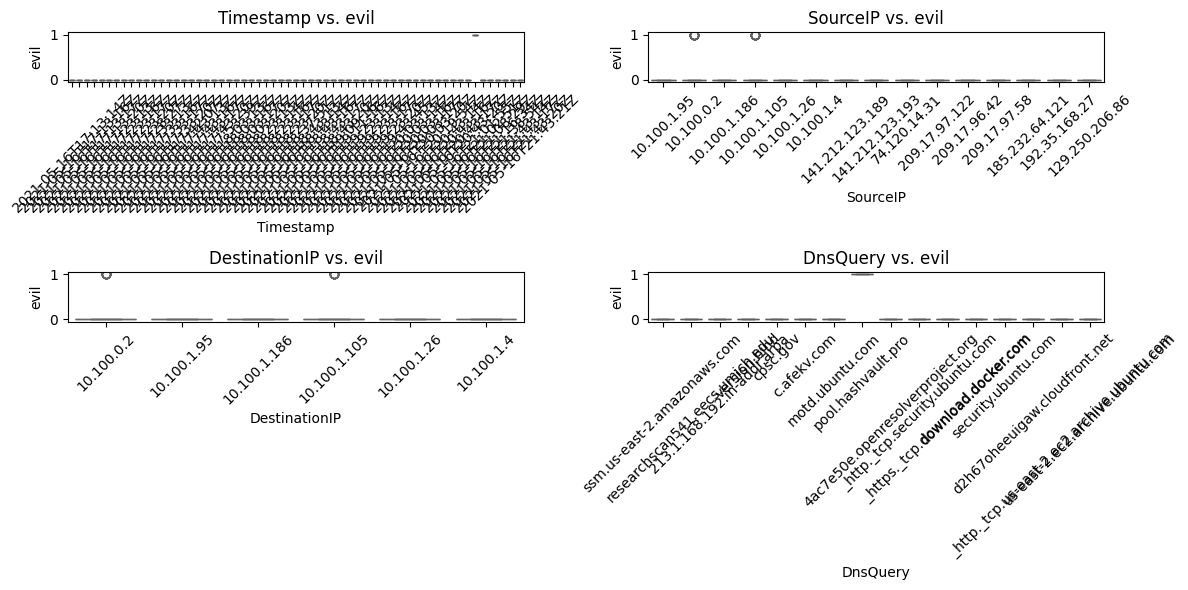

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(combined_data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns[:4]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=combined_data[col], y=combined_data['evil'], palette='Set3')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs. evil")

plt.tight_layout()
plt.show()
